# Intro to ML - Lab 12

## Mini Challenge

### Loading Dataset

In [34]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('Groceries_dataset.csv')
display(df.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Data Analysis

In [35]:
print("Null Values Count:")
print(df.isnull().sum())

print("\nUnique Items:")
for item in df['itemDescription'].unique():
    print(item)

Null Values Count:
Member_number      0
Date               0
itemDescription    0
dtype: int64

Unique Items:
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty c

### Data Transformation

In [36]:
df['TransactionID'] = df['Member_number'].astype(str)

# Transactional format
basket = (
    df.groupby(['TransactionID', 'itemDescription'])['itemDescription']
    .count()
    .unstack()
    .fillna(0)
)

# Convert to 1/0 format
basket = basket.map(lambda x: 1 if x > 0 else 0)

print("Basket Shape:", basket.shape)
basket.head()

Basket Shape: (3898, 167)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Apply Apriori Algorithm

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(basket,
                            min_support=0.01,
                            use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))


Frequent Itemsets:
       support                        itemsets
113   0.458184                    (whole milk)
69    0.376603              (other vegetables)
84    0.349666                    (rolls/buns)
94    0.313494                          (soda)
114   0.282966                        (yogurt)
106   0.233710                (tropical fruit)
85    0.230631               (root vegetables)
7     0.213699                 (bottled water)
89    0.206003                       (sausage)
1050  0.191380  (whole milk, other vegetables)


### Generate Assosiation Rules

In [39]:
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.3)

# Apply lift threshold
rules = rules[rules['lift'] >= 1.2]

# Sort by Lift
rules = rules.sort_values(by="lift", ascending=False)

print("Association Rules sorted by Lift:")
display(rules.head())

Association Rules sorted by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3380,"(sausage, rolls/buns, other vegetables)","(whole milk, yogurt)",0.041816,0.150590,0.013597,0.325153,2.159196,1.0,0.007300,1.258671,0.560294,0.076040,0.205511,0.207721
2896,"(whole milk, frozen meals)","(rolls/buns, other vegetables)",0.032581,0.146742,0.010005,0.307087,2.092699,1.0,0.005224,1.231407,0.539733,0.059091,0.187921,0.187634
3373,"(yogurt, rolls/buns, bottled water)","(whole milk, other vegetables)",0.026424,0.191380,0.010518,0.398058,2.079934,1.0,0.005461,1.343352,0.533308,0.050743,0.255594,0.226509
3390,"(yogurt, shopping bags, rolls/buns)","(whole milk, other vegetables)",0.025141,0.191380,0.010005,0.397959,2.079417,1.0,0.005194,1.343131,0.532483,0.048447,0.255471,0.225119
2838,"(curd, sausage)","(whole milk, yogurt)",0.032068,0.150590,0.010005,0.312000,2.071850,1.0,0.005176,1.234607,0.534479,0.057949,0.190026,0.189220


### Scatterplot

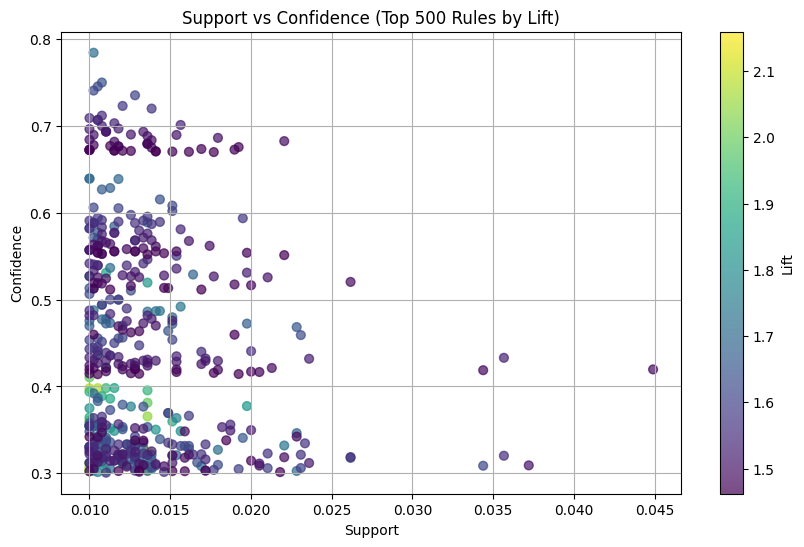

In [40]:
import matplotlib.pyplot as plt

# Take only top 100 strongest rules
plot_rules = rules.sort_values(by='lift', ascending=False).head(500)

plt.figure(figsize=(10, 6))
plt.scatter(plot_rules['support'],
            plot_rules['confidence'],
            c=plot_rules['lift'],
            cmap='viridis',
            s=40,
            alpha=0.7)

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (Top 500 Rules by Lift)")
plt.grid(True)
plt.show()


### Heatmap

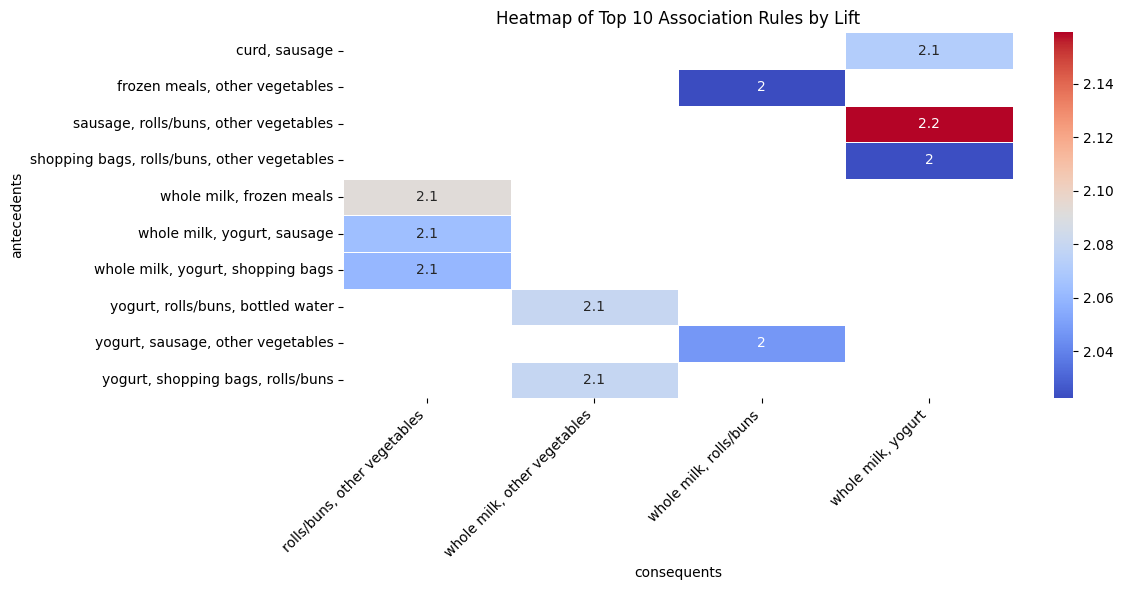

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

top_rules = rules.head(10).copy()

# Clean labels
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ", ".join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ", ".join(list(x)))

pivot_table = top_rules.pivot(index='antecedents',
                              columns='consequents',
                              values='lift')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table,
            cmap="coolwarm",
            annot=True,
            linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Heatmap of Top 10 Association Rules by Lift")
plt.tight_layout()
plt.show()


### Network

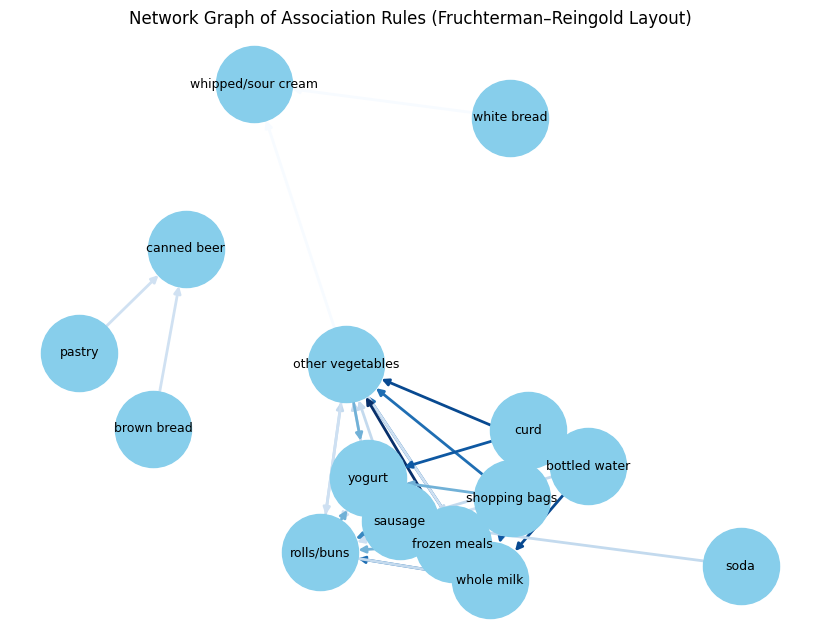

In [42]:
import networkx as nx

G = nx.DiGraph()

for _, row in rules.head(15).iterrows():
    for a in row['antecedents']:
        for b in row['consequents']:
            G.add_edge(a, b, weight=row['lift'])

plt.figure(figsize=(8, 6))

# Fruchterman–Reingold (force-directed) layout
pos = nx.fruchterman_reingold_layout(G, k=0.8, iterations=50)

edges = G.edges(data=True)
weights = [data['weight'] for _,_,data in edges]

nx.draw(G, pos,
        with_labels=True,
        node_size=3000,
        node_color="skyblue",
        font_size=9,
        edge_color=weights,
        edge_cmap=plt.cm.Blues,
        width=2)

plt.title("Network Graph of Association Rules (Fruchterman–Reingold Layout)")
plt.show()


---

**Q1.** What rules have highest lift, what do they indicate?

**Ans.** The highest value of lift is between "sausage, rolls/buns, other vegetables" (A) as antecedents and "whole milk, yogurt" as consequents (B). High lift value shows that A increases the likelihood of B

---

**Q2.** Identify at least one niche relationship (low support, high lift). Why might this rule be valuable?

**Ans.** The relationship between "whole milk, frozen meals" (A) as antecedents and "rolls/buns, other vegetables" as consequents (B) has high lift (greater than 2) and low support (close to 0.01, minimum threshold)

This shows that even though less customers buy this combo, it is more predictive